In [89]:
import pandas as pd

In [90]:
df=pd.read_csv('c4_epa_air_quality.csv')

This is an air quality index dataset Source-Google Advanced Data Analytics Certification Modified Dataset

In [91]:
df.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [92]:
df.shape

(260, 10)

Sampling is taking a part of the entire population and aassuming that the insights from that sample will apply to the entire population.

This can be checked using Central limit theory which states that the sample distribtion mean and sample distribution propotion are similar to the population mean and propotion.

As the sample size(number of samples increases),the sample distribution mean and propotion become close to population mean and propotion.

As the sample distribution mean become closer to the population mean it takes the shape of normal distribution,same applies to sample distribution of propotion.

All of this is possible if the data sample is not biased.

The difference between the population mean and sample distribution mean can be obtained by the formula STD/sqrt(n) n is sample size Standard error of mean.

// Standard error of propotion is sqrt(p(1-p)/n) where p is (the percentage) propotion value we get

The standard error becomes lower when Sample mean becomes closer to population mean

In [93]:
df['aqi'].mean()

6.757692307692308

In [94]:
from scipy import stats

In [95]:
sample1=df.sample(n=50,replace=False,random_state=4006)

n is number of records we want in our sample
replace is if you want the row to be put back after it has beeb selected or you want to select it and not place it back.Non repetetion is better to avoid row dupliction

In [96]:
sample1['aqi'].mean()

7.14

In [97]:
sample2=df.sample(n=50,replace=False,random_state=500056)

In [98]:
sample2['aqi'].mean()

5.92

In [99]:
sample3=df.sample(n=50,replace=False,random_state=50)

In [100]:
sample3['aqi'].mean()

6.3

In [101]:
sample10000=[]
for i in range(10000):
    sample10000.append(df.aqi.sample(n=50,replace=False).mean())
sample10000=pd.DataFrame(data={'samples_means':sample10000})

In [102]:
sample10000


,samples_means
0,6.88
1,6.64
2,7.48
3,7.12
4,7.08
...,...
9995,9.36
9996,6.14
9997,7.84
9998,5.10


In [103]:
sample10000.samples_means.mean()

6.749008000000024

Initally when we took 3 different samples of 50 the mean values were close to population values in first two cases and very close in third sample.

When we created 10000 random 50 different samples,we found the mean of 10000 samples means is very close to population mean of original dataset.Central limit theorm applies

array([[<AxesSubplot:title={'center':'samples_means'}>]], dtype=object)

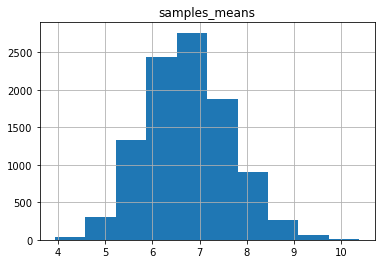

In [104]:
sample10000.hist()

It has normal distribution too for 10000 samples

In [105]:
import numpy as np

In [106]:
standard_error_mean=sample10000.std()/np.sqrt(len(sample10000))
standard_error_mean

samples_means    0.008988
dtype: float64

the standard mean error is low which shows slight variation between population and sample mean which is good

The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense . For reference, AQI values at or below 100 are generally thought of as satisfactory.